# Assignment#1 - Quiz

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model

In [81]:
url = 'https://drive.google.com/file/d/1QcKzIJlO6WRUH4IkrKAvDmBVEipXkeQb/view?usp=sharing'

path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

Data = pd.read_csv(path)

In [82]:
Data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,fare_amount
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,238,239,6.0
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,239,238,7.0
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,238,238,6.0
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,238,151,5.5
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,193,193,3.5


In [83]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243241 entries, 0 to 1243240
Data columns (total 7 columns):
VendorID                 1227632 non-null float64
tpep_pickup_datetime     1243241 non-null object
tpep_dropoff_datetime    1243241 non-null object
passenger_count          1227632 non-null float64
PULocationID             1243241 non-null int64
DOLocationID             1243241 non-null int64
fare_amount              1243241 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 66.4+ MB


In [84]:
Data.isnull().sum()

VendorID                 15609
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          15609
PULocationID                 0
DOLocationID                 0
fare_amount                  0
dtype: int64

In [85]:
Data.shape

(1243241, 7)

### Question#2

In [86]:
Data.describe()

,VendorID,passenger_count,PULocationID,DOLocationID,fare_amount
count,1.227632e+06,1.227632e+06,1.243241e+06,1.243241e+06,1.243241e+06
mean,1.676771e+00,1.568692e+00,1.627453e+02,1.607467e+02,1.302977e+01
std,4.677094e-01,1.181809e+00,6.610786e+01,7.098176e+01,1.293962e+01
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-1.238000e+03
25%,1.000000e+00,1.000000e+00,1.250000e+02,1.070000e+02,6.000000e+00
50%,2.000000e+00,1.000000e+00,1.610000e+02,1.620000e+02,9.000000e+00
75%,2.000000e+00,2.000000e+00,2.330000e+02,2.330000e+02,1.400000e+01
max,2.000000e+00,9.000000e+00,2.650000e+02,2.650000e+02,1.238000e+03


In [87]:
Data['passenger_count'].max()

9.0

In [88]:
Data['fare_amount'].max()

1238.0

In [89]:
Data['fare_amount'].mean()

13.02977364806841

### Question#3

In [90]:
Data['PULocationID'].count()

1243241

In [91]:
Data['PULocationID'].unique().sum()

33929

In [92]:
Data['DOLocationID'].count()

1243241

In [93]:
Data['DOLocationID'].unique().sum()

34728

In [94]:
## Most frequently used PULocationID
Data['PULocationID'].mode()

0    132
dtype: int64

In [95]:
## Least frequently used DOLocationID 
from collections import Counter

data_list = Data['DOLocationID']
least_common = Counter(data_list).most_common()[-1]
print(least_common)

(104, 1)


### Question#4

In [96]:
Data.head(1)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,fare_amount
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,238,239,6.0


In [97]:
Data.tpep_pickup_datetime = pd.to_datetime(Data.tpep_pickup_datetime)
Data.tpep_pickup_datetime = pd.DatetimeIndex(Data.tpep_pickup_datetime)

In [98]:
Data.tpep_dropoff_datetime = pd.to_datetime(Data.tpep_dropoff_datetime)
Data.tpep_dropoff_datetime = pd.DatetimeIndex(Data.tpep_dropoff_datetime)

In [99]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243241 entries, 0 to 1243240
Data columns (total 7 columns):
VendorID                 1227632 non-null float64
tpep_pickup_datetime     1243241 non-null datetime64[ns]
tpep_dropoff_datetime    1243241 non-null datetime64[ns]
passenger_count          1227632 non-null float64
PULocationID             1243241 non-null int64
DOLocationID             1243241 non-null int64
fare_amount              1243241 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2)
memory usage: 66.4 MB


In [100]:
Data['PUweekday'] = Data.tpep_pickup_datetime.dt.day_name()
Data['DOweekday'] = Data.tpep_dropoff_datetime.dt.day_name()

In [101]:
Data.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,fare_amount,PUweekday,DOweekday
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,238,239,6.0,Wednesday,Wednesday
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,239,238,7.0,Wednesday,Wednesday


In [102]:
Data.groupby('PUweekday')['PULocationID'].sum()

PUweekday
Friday       29942232
Monday       29784432
Saturday     29479940
Sunday       26421289
Thursday     26460134
Tuesday      33599293
Wednesday    26644296
Name: PULocationID, dtype: int64

In [103]:
Data.groupby('DOweekday')['DOLocationID'].sum()

DOweekday
Friday       29440867
Monday       29454581
Saturday     29053902
Sunday       26417825
Thursday     26071426
Tuesday      33140443
Wednesday    26267820
Name: DOLocationID, dtype: int64

In [104]:
Data.tail(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,fare_amount,PUweekday,DOweekday
1243231,NaN,2020-01-07 09:18:41,2020-01-07 09:56:10,NaN,91,231,29.60,Tuesday,Tuesday
1243232,NaN,2020-01-07 09:18:41,2020-01-07 09:56:10,NaN,91,231,29.60,Tuesday,Tuesday
1243233,NaN,2020-01-07 09:37:00,2020-01-07 10:06:00,NaN,164,74,28.95,Tuesday,Tuesday
1243234,NaN,2020-01-07 09:37:00,2020-01-07 10:06:00,NaN,164,74,28.95,Tuesday,Tuesday
1243235,NaN,2020-01-07 09:18:00,2020-01-07 09:55:00,NaN,151,145,28.36,Tuesday,Tuesday
1243236,NaN,2020-01-07 09:18:00,2020-01-07 09:55:00,NaN,151,145,28.36,Tuesday,Tuesday
1243237,NaN,2020-01-07 09:05:00,2020-01-07 09:30:00,NaN,259,78,24.36,Tuesday,Tuesday
1243238,NaN,2020-01-07 09:05:00,2020-01-07 09:30:00,NaN,259,78,24.36,Tuesday,Tuesday
1243239,NaN,2020-01-07 09:49:00,2020-01-07 09:58:00,NaN,116,166,20.06,Tuesday,Tuesday
1243240,NaN,2020-01-07 09:49:00,2020-01-07 09:58:00,NaN,116,166,20.06,Tuesday,Tuesday


### Question#5

In [105]:
new_df = Data[(Data['VendorID'] == 2) & (Data.fare_amount < Data.fare_amount.mean()) & (Data.passenger_count > 5)]
new_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,fare_amount,PUweekday,DOweekday
195,2.0,2020-01-01 00:38:43,2020-01-01 00:54:55,6.0,236,170,12.0,Wednesday,Wednesday
218,2.0,2020-01-01 00:24:07,2020-01-01 00:27:48,6.0,129,260,5.5,Wednesday,Wednesday
219,2.0,2020-01-01 00:39:43,2020-01-01 00:45:55,6.0,226,260,7.0,Wednesday,Wednesday
220,2.0,2020-01-01 00:48:29,2020-01-01 00:55:05,6.0,260,129,6.5,Wednesday,Wednesday
453,2.0,2020-01-01 00:47:13,2020-01-01 00:54:52,6.0,161,140,7.5,Wednesday,Wednesday
...,...,...,...,...,...,...,...,...,...
1227569,2.0,2020-01-07 20:28:35,2020-01-07 20:35:20,6.0,163,170,7.0,Tuesday,Tuesday
1227576,2.0,2020-01-07 23:57:24,2020-01-08 00:05:22,6.0,229,186,8.0,Tuesday,Wednesday
1227577,2.0,2020-01-07 23:55:28,2020-01-08 00:01:55,6.0,230,163,6.0,Tuesday,Wednesday
1227592,2.0,2020-01-07 23:58:26,2020-01-08 00:07:45,6.0,161,79,9.5,Tuesday,Wednesday


In [106]:
new_df.shape

(19443, 9)

In [107]:
new_df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
PULocationID             0
DOLocationID             0
fare_amount              0
PUweekday                0
DOweekday                0
dtype: int64

In [108]:
new_df['fare_amount'].mean()

7.63299490819318

In [109]:
new_df['fare_amount'].median()

7.5

In [110]:
new_df['passenger_count'].mean()

6.000257161960603

In [111]:
new_df.groupby('PUweekday')['PULocationID'].sum()

PUweekday
Friday       471695
Monday       445852
Saturday     508147
Sunday       408676
Thursday     444101
Tuesday      524933
Wednesday    424095
Name: PULocationID, dtype: int64

In [112]:
new_df.groupby('PUweekday')['DOLocationID'].sum()

PUweekday
Friday       475567
Monday       444341
Saturday     503939
Sunday       408639
Thursday     444375
Tuesday      520222
Wednesday    416619
Name: DOLocationID, dtype: int64

### Question#6

In [131]:
data2 = Data.copy()

In [132]:
data3 = Data.copy()

In [133]:
data2.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,fare_amount,PUweekday,DOweekday
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,238,239,6.0,Wednesday,Wednesday
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,239,238,7.0,Wednesday,Wednesday
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,238,238,6.0,Wednesday,Wednesday
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,238,151,5.5,Wednesday,Wednesday
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,193,193,3.5,Wednesday,Wednesday


In [135]:
## with missing values
data2.passenger_count.median()

1.0

In [134]:
data3.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,fare_amount,PUweekday,DOweekday
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,238,239,6.0,Wednesday,Wednesday
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,239,238,7.0,Wednesday,Wednesday
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,238,238,6.0,Wednesday,Wednesday
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,238,151,5.5,Wednesday,Wednesday
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,193,193,3.5,Wednesday,Wednesday


In [136]:
### with missing values
data3.passenger_count.median()

1.0

In [137]:
data2.isnull().sum()

VendorID                 15609
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          15609
PULocationID                 0
DOLocationID                 0
fare_amount                  0
PUweekday                    0
DOweekday                    0
dtype: int64

In [138]:
### Case 1
data2.passenger_count.fillna(data2.passenger_count.max(), inplace= True)

In [139]:
data2.isnull().sum()

VendorID                 15609
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
PULocationID                 0
DOLocationID                 0
fare_amount                  0
PUweekday                    0
DOweekday                    0
dtype: int64

In [140]:
### without missing values
data2.passenger_count.median()

1.0

In [141]:
### Case 2
data3.passenger_count.fillna(data3.passenger_count.median(), inplace = True)

In [142]:
data3.isnull().sum()

VendorID                 15609
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
PULocationID                 0
DOLocationID                 0
fare_amount                  0
PUweekday                    0
DOweekday                    0
dtype: int64

In [143]:
### without missing values
data3.passenger_count.median()

1.0

### Q#7 - Q#9

In [147]:
exam_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/exam_scores.csv')

In [148]:
exam_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,bachelor's degree,standard,none,74,68,67
1,female,group C,some college,standard,completed,58,68,66
2,male,group C,some college,free/reduced,none,66,65,65
3,female,group D,bachelor's degree,free/reduced,none,74,75,73
4,male,group D,some college,standard,none,78,77,71


In [149]:
exam_data.shape

(1000, 8)

In [150]:
exam_data['race/ethnicity'].value_counts()

group C    294
group D    280
group B    211
group E    152
group A     63
Name: race/ethnicity, dtype: int64

In [151]:
exam_data['parental level of education'].value_counts()

some college          226
associate's degree    197
high school           190
some high school      181
bachelor's degree     130
master's degree        76
Name: parental level of education, dtype: int64

In [152]:
exam_data['test preparation course'].value_counts()

none         654
completed    346
Name: test preparation course, dtype: int64

In [156]:
exam_data['test preparation course'].value_counts()/exam_data.shape[0]

none         0.654
completed    0.346
Name: test preparation course, dtype: float64

In [160]:
exam_data.corr(method ='pearson') 

,math score,reading score,writing score
math score,1.000000,0.818193,0.817299
reading score,0.818193,1.000000,0.955211
writing score,0.817299,0.955211,1.000000


In [158]:
import missingno as msno

C:\Users\DC\Anaconda3\lib\site-packages\seaborn\matrix.py:287: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\DC\Anaconda3\lib\site-packages\seaborn\matrix.py:287: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


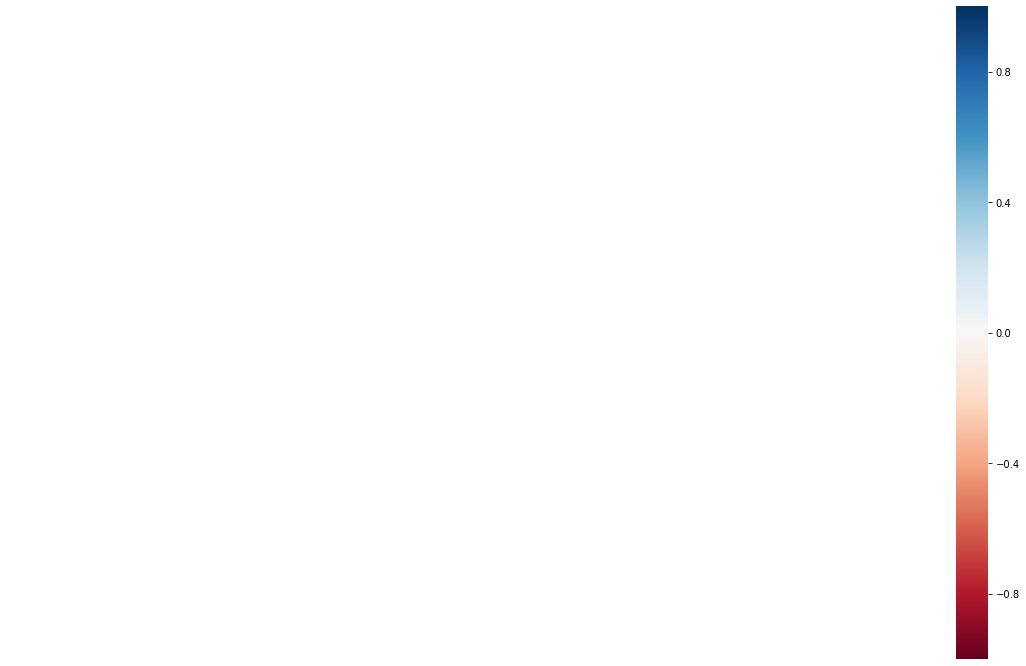

In [159]:
msno.heatmap(exam_data)

In [161]:
exam_data['gender'].value_counts()

female    502
male      498
Name: gender, dtype: int64

In [163]:
group_a = exam_data[exam_data['race/ethnicity'] == 'group A']
group_a

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
19,female,group A,some high school,free/reduced,none,58,80,68
80,male,group A,some high school,free/reduced,none,72,74,69
98,male,group A,some high school,standard,none,45,48,35
109,male,group A,bachelor's degree,free/reduced,none,47,55,53
128,male,group A,associate's degree,standard,completed,100,97,94
...,...,...,...,...,...,...,...,...
908,female,group A,master's degree,standard,none,78,99,93
946,female,group A,master's degree,free/reduced,completed,44,53,55
989,male,group A,some college,standard,none,74,65,67
992,male,group A,bachelor's degree,standard,none,78,73,71


In [164]:
course_completed = exam_data[exam_data['test preparation course'] == 'completed']
course_completed

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,58,68,66
5,female,group D,associate's degree,standard,completed,75,82,85
8,male,group C,some high school,standard,completed,65,58,55
13,female,group D,high school,free/reduced,completed,40,60,51
15,male,group D,some college,free/reduced,completed,75,64,70
...,...,...,...,...,...,...,...,...
980,male,group E,associate's degree,standard,completed,95,84,92
982,male,group D,associate's degree,free/reduced,completed,84,82,84
986,female,group B,high school,free/reduced,completed,60,81,79
991,male,group B,master's degree,standard,completed,78,76,80


In [165]:
group_a['test preparation course'].value_counts()

none         42
completed    21
Name: test preparation course, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

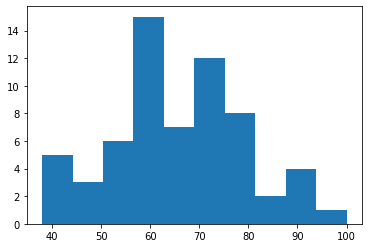

In [170]:
plt.hist(group_a['math score'])
plt.show

(array([ 4.,  6., 25., 30., 59., 55., 51., 61., 37., 18.]),
 array([ 28. ,  35.2,  42.4,  49.6,  56.8,  64. ,  71.2,  78.4,  85.6,
         92.8, 100. ]),
 <a list of 10 Patch objects>)

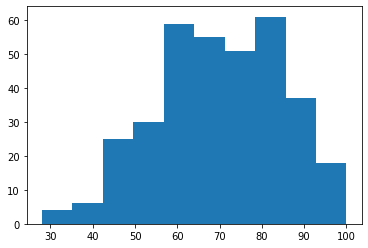

In [171]:
plt.hist(course_completed['math score'])

In [172]:
course_completed['gender'].value_counts()

male      184
female    162
Name: gender, dtype: int64

### Question#9

In [174]:
concat_data = pd.concat([group_a, course_completed], axis = 0)
concat_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
19,female,group A,some high school,free/reduced,none,58,80,68
80,male,group A,some high school,free/reduced,none,72,74,69
98,male,group A,some high school,standard,none,45,48,35
109,male,group A,bachelor's degree,free/reduced,none,47,55,53
128,male,group A,associate's degree,standard,completed,100,97,94
...,...,...,...,...,...,...,...,...
980,male,group E,associate's degree,standard,completed,95,84,92
982,male,group D,associate's degree,free/reduced,completed,84,82,84
986,female,group B,high school,free/reduced,completed,60,81,79
991,male,group B,master's degree,standard,completed,78,76,80


In [179]:
#### duplicate
concat_data.duplicated().sum()

21